# Wine quality red 

#### Imports

In [1]:
% run outils.py # les fonctions perso et les imports
% matplotlib inline

#### Utilisation de commandes système

In [2]:
#!ls

In [3]:
#!head winequality-red.csv

#### Importation des données et premier aperçu

In [4]:
data = pd.read_csv('./winequality-red.csv', sep = ',')

In [5]:
#data.head(5)

#### Exportation d'une Dataframe au format csv

In [6]:
#data.head(10).to_csv('premieres_lignes.csv')

#### Analyse descriptive des données

In [7]:
# Modalités de quality
#mod_qual = data['quality'].unique()
#mod_qual.sort()
#print(mod_qual)

In [8]:
# Distribution des notes
#distrib = data['quality'].value_counts()
#distrib

In [9]:
# Valeurs manquantes ?
#data.isnull().sum()

In [10]:
# Doublons ?
#data.duplicated().sum()

In [11]:
# Suppressions des doublons
data = data.drop_duplicates()

In [12]:
# A quelles classes appartiennent les doublons ?
#distrib_sans_doublons = data['quality'].value_counts()
#distrib - distrib_sans_doublons

In [13]:
# Nouvelle distribution des classes
#distrib_sans_doublons

In [14]:
# Statistiques descriptives de base
#data.describe()

In [16]:
# distribution fréquentielle des classes
data['quality'].value_counts()
#data['quality'].plot(kind = '')

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [ ]:
# Matrice des corrélations
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

mat_corr = data.corr().ix['fixed acidity':'alcohol', 'fixed acidity':'alcohol']
fig = plt.figure(figsize = (30, 20))
ax = fig.add_subplot(111)
mask = np.zeros_like(mat_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(mat_corr, mask = mask, annot = True, linewidth = 0.5, fmt = '.2f', ax = ax)
plt.savefig('matrice_correlations.png')

#### Distribution des variables

In [ ]:
# Histogrammes des variables
#data['quality'].plot(kind = 'hist', bins = 6, width = 0.4, alpha = 0.7)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
data.hist(ax = ax, alpha = 0.8, grid = True, bins = 30);
plt.savefig('./IMAGES/histogrammes_variables')

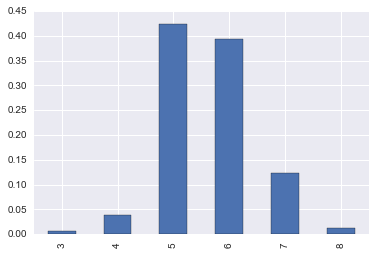

In [32]:
# Distribution des classes
fig = plt.figure()
density = fig.add_subplot(111)
plt.grid(True)
d = data['quality'].value_counts()
data2 = (d / sum(d)).sort_index() 
data2.plot(kind = 'bar')
fig.savefig('./IMAGES/distrib_classes_percent.png')

#### Centrage-réduction des données

In [ ]:
# Centrage-réduction des variables d'entrée
liste_var = list(data.columns) # on transforme l'index de la dataframe en liste
liste_col = liste_var[:-1] # on ne prend pas la colonne 'quality'
nouvel_index = Index(liste_col)
X = data[nouvel_index] 

# On créé une nouvelle matrice de données normées, attention, il faut garder l'index précédent
X_norm = DataFrame(StandardScaler().fit_transform(X), columns = liste_col, index = data.index)

# On ajoute la dernière colonne
data_norm = X_norm.copy()
data_norm['quality']= data['quality']

data_norm.head(7)
#X_norm.head(5)

#### Détection des outliers

In [ ]:
# Affichage des boxplot : attention la détection des outliers par cette méthode est vouée à l'échec pour les
# distributions non normales (ce qui est le cas pour la plupart des variables)
# Il faudrait regarder : pH et densité (lois normales)
#fig = plt.figure()
#ax = fig.add_subplot(111)
#X_norm.plot(kind = 'box', figsize = (30, 20), grid = False, ax = ax)

In [ ]:
# Affichage des mauvais vins (classes 3 et 4)
#data_norm[data_norm['quality'] < 5].head(10)

#### Définition des entrées et des sorties

In [ ]:
# Rappel :
# - X_norm : les entrées normées
# - data_norm : les entrées normées avec les colonnes 'quality' 

# Sortie pour la classification : codage disjonctif des classes
y_disjonctif = pd.get_dummies(data['quality'], prefix = 'qual')

# Sortie pour la classification : codage ordinal des classes
df = codage_ordinal(data_norm, 'quality', 'ord')
y_ordinal = df[['ord_3', 'ord_4', 'ord_5', 'ord_6', 'ord_7', 'ord_8']]

# Sortie pour la régression : on ne touche à rien
y = data_norm['quality']

#### Ensembles d'apprentissage et de test

In [ ]:
# Définition des ensemble train et test
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33)

#### Projection des données par ACP linéaire

In [ ]:
#proj_ACP(X_norm, y)

#### Analyse en composante principale non linéaire

In [ ]:
#kpca = KernelPCA(kernel = "poly", gamma = 0.001, n_components = 3)
#X_kpca = kpca.fit_transform(X_norm)
#X_kpca_proj = DataFrame(X_kpca, columns = ['x', 'y'], index = X_norm.index)
#proj(X_kpca_proj, y)

#### Analyse discriminante linéaire

In [ ]:
proj_AD(X_norm, y)
mpl.rcParams['legend.fontsize'] = 30
plt.savefig('./IMAGES/projection_AD')